## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  69.864586   258.076067  0.768003  5.126102  1.322168
1  76.190385   317.464660  0.829440  8.127664  1.220505
2  32.864758   150.241333  0.669643  5.169667  1.428106
3  31.037062   826.208956  0.758180  7.447032  1.570348
4   4.277194  1563.514648  0.966436  3.068865  1.748432


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9903113	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9817215	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9738948	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9655588	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9561469	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9480121	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9390060	total: 60.2ms	remaining: 8.54s
7:	learn: 0.9305580	total: 60.7ms	remaining: 7.52s
8:	learn: 0.9222407	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9140653	total: 61.7ms	remaining: 6.11s
10:	learn: 0.9052519	total: 62.2ms	remaining: 5.59s
11:	learn: 0.8971356	total: 62.6ms	remaining: 5.15s
12:	learn: 0.8888044	total: 63.1ms	remaining: 4.79s
13:	learn: 0.8803163	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8727393	total: 64ms	remaining: 4.2s
15:	learn: 0.8658809	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8579815	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8506428	total: 65.2ms	remaining: 3.56s
18:	learn: 0.8420927	total: 65.6ms	remaining: 3

67:	learn: 0.5595427	total: 88.4ms	remaining: 1.21s
68:	learn: 0.5559157	total: 89ms	remaining: 1.2s
69:	learn: 0.5521211	total: 89.3ms	remaining: 1.19s
70:	learn: 0.5481953	total: 89.8ms	remaining: 1.17s
71:	learn: 0.5441570	total: 90.2ms	remaining: 1.16s
72:	learn: 0.5403562	total: 90.6ms	remaining: 1.15s
73:	learn: 0.5361716	total: 91.1ms	remaining: 1.14s
74:	learn: 0.5314878	total: 91.5ms	remaining: 1.13s
75:	learn: 0.5274937	total: 92.1ms	remaining: 1.12s
76:	learn: 0.5237259	total: 92.5ms	remaining: 1.11s
77:	learn: 0.5198362	total: 93.1ms	remaining: 1.1s
78:	learn: 0.5155704	total: 93.6ms	remaining: 1.09s
79:	learn: 0.5116893	total: 94ms	remaining: 1.08s
80:	learn: 0.5081516	total: 94.4ms	remaining: 1.07s
81:	learn: 0.5046161	total: 94.9ms	remaining: 1.06s
82:	learn: 0.5009098	total: 95.3ms	remaining: 1.05s
83:	learn: 0.4969638	total: 95.9ms	remaining: 1.05s
84:	learn: 0.4940742	total: 96.4ms	remaining: 1.04s
85:	learn: 0.4907736	total: 97ms	remaining: 1.03s
86:	learn: 0.4869304

249:	learn: 0.2068221	total: 170ms	remaining: 509ms
250:	learn: 0.2059751	total: 170ms	remaining: 508ms
251:	learn: 0.2053719	total: 171ms	remaining: 507ms
252:	learn: 0.2047344	total: 171ms	remaining: 506ms
253:	learn: 0.2038524	total: 172ms	remaining: 504ms
254:	learn: 0.2031228	total: 172ms	remaining: 502ms
255:	learn: 0.2022047	total: 172ms	remaining: 501ms
256:	learn: 0.2014201	total: 173ms	remaining: 500ms
257:	learn: 0.2005478	total: 173ms	remaining: 499ms
258:	learn: 0.1995744	total: 174ms	remaining: 497ms
259:	learn: 0.1989478	total: 174ms	remaining: 496ms
260:	learn: 0.1983173	total: 174ms	remaining: 494ms
261:	learn: 0.1976555	total: 175ms	remaining: 492ms
262:	learn: 0.1968104	total: 175ms	remaining: 491ms
263:	learn: 0.1960649	total: 175ms	remaining: 489ms
264:	learn: 0.1953835	total: 176ms	remaining: 488ms
265:	learn: 0.1945849	total: 176ms	remaining: 486ms
266:	learn: 0.1936520	total: 177ms	remaining: 485ms
267:	learn: 0.1929775	total: 177ms	remaining: 484ms
268:	learn: 

412:	learn: 0.1160077	total: 254ms	remaining: 361ms
413:	learn: 0.1157868	total: 254ms	remaining: 360ms
414:	learn: 0.1155687	total: 255ms	remaining: 359ms
415:	learn: 0.1154262	total: 255ms	remaining: 358ms
416:	learn: 0.1151648	total: 255ms	remaining: 357ms
417:	learn: 0.1150451	total: 256ms	remaining: 356ms
418:	learn: 0.1146430	total: 256ms	remaining: 355ms
419:	learn: 0.1143318	total: 256ms	remaining: 354ms
420:	learn: 0.1141932	total: 257ms	remaining: 353ms
421:	learn: 0.1138658	total: 257ms	remaining: 352ms
422:	learn: 0.1136250	total: 258ms	remaining: 351ms
423:	learn: 0.1131694	total: 258ms	remaining: 351ms
424:	learn: 0.1129365	total: 258ms	remaining: 350ms
425:	learn: 0.1127104	total: 259ms	remaining: 349ms
426:	learn: 0.1123480	total: 259ms	remaining: 348ms
427:	learn: 0.1119590	total: 260ms	remaining: 347ms
428:	learn: 0.1118271	total: 260ms	remaining: 346ms
429:	learn: 0.1114789	total: 260ms	remaining: 345ms
430:	learn: 0.1111260	total: 261ms	remaining: 344ms
431:	learn: 

629:	learn: 0.0703563	total: 351ms	remaining: 206ms
630:	learn: 0.0700540	total: 351ms	remaining: 205ms
631:	learn: 0.0698043	total: 352ms	remaining: 205ms
632:	learn: 0.0696936	total: 352ms	remaining: 204ms
633:	learn: 0.0694157	total: 353ms	remaining: 204ms
634:	learn: 0.0693066	total: 353ms	remaining: 203ms
635:	learn: 0.0690342	total: 354ms	remaining: 202ms
636:	learn: 0.0689752	total: 354ms	remaining: 202ms
637:	learn: 0.0689174	total: 355ms	remaining: 201ms
638:	learn: 0.0687964	total: 355ms	remaining: 201ms
639:	learn: 0.0685311	total: 356ms	remaining: 200ms
640:	learn: 0.0684907	total: 357ms	remaining: 200ms
641:	learn: 0.0683489	total: 357ms	remaining: 199ms
642:	learn: 0.0681426	total: 358ms	remaining: 199ms
643:	learn: 0.0679411	total: 358ms	remaining: 198ms
644:	learn: 0.0676523	total: 358ms	remaining: 197ms
645:	learn: 0.0675287	total: 358ms	remaining: 196ms
646:	learn: 0.0674893	total: 359ms	remaining: 196ms
647:	learn: 0.0672060	total: 359ms	remaining: 195ms
648:	learn: 

832:	learn: 0.0440663	total: 433ms	remaining: 86.9ms
833:	learn: 0.0439743	total: 434ms	remaining: 86.4ms
834:	learn: 0.0439479	total: 434ms	remaining: 85.8ms
835:	learn: 0.0438578	total: 435ms	remaining: 85.3ms
836:	learn: 0.0437037	total: 435ms	remaining: 84.7ms
837:	learn: 0.0436777	total: 435ms	remaining: 84.2ms
838:	learn: 0.0436440	total: 436ms	remaining: 83.6ms
839:	learn: 0.0436157	total: 436ms	remaining: 83ms
840:	learn: 0.0435783	total: 436ms	remaining: 82.5ms
841:	learn: 0.0434276	total: 436ms	remaining: 81.9ms
842:	learn: 0.0432704	total: 437ms	remaining: 81.4ms
843:	learn: 0.0431170	total: 437ms	remaining: 80.8ms
844:	learn: 0.0430843	total: 437ms	remaining: 80.2ms
845:	learn: 0.0430022	total: 438ms	remaining: 79.7ms
846:	learn: 0.0428771	total: 438ms	remaining: 79.1ms
847:	learn: 0.0428244	total: 438ms	remaining: 78.6ms
848:	learn: 0.0427924	total: 439ms	remaining: 78ms
849:	learn: 0.0427037	total: 439ms	remaining: 77.5ms
850:	learn: 0.0426790	total: 439ms	remaining: 76.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

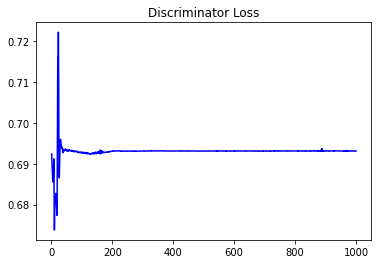

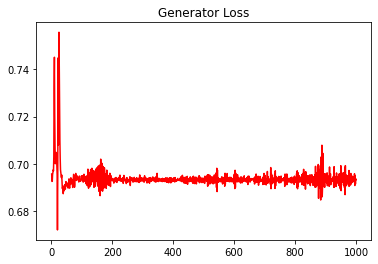

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.28300539228872235


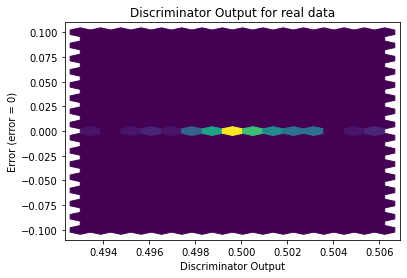

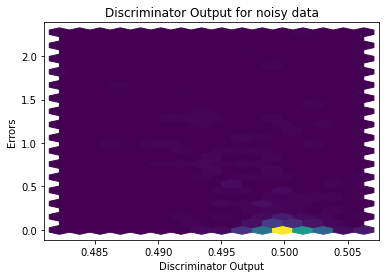

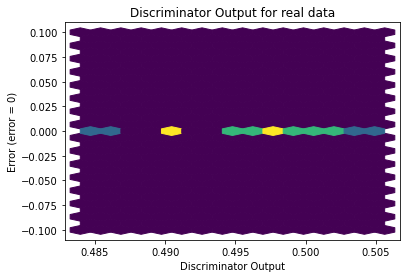

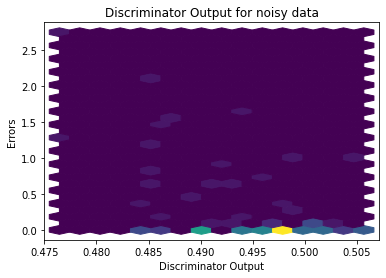

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


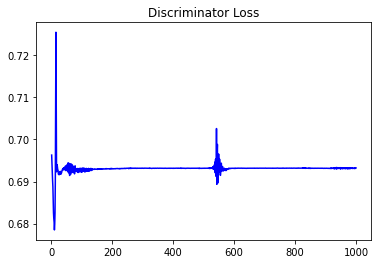

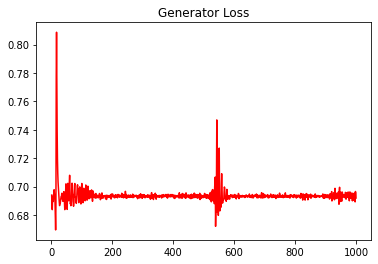

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.35368765173733624


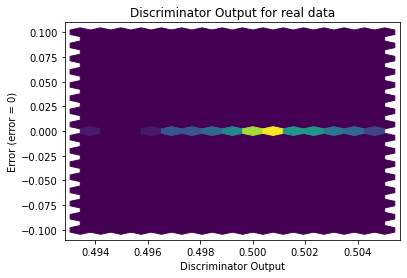

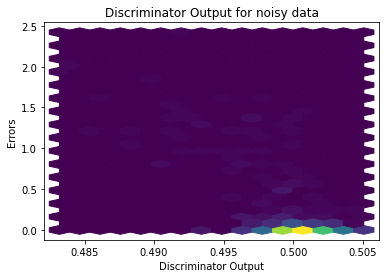

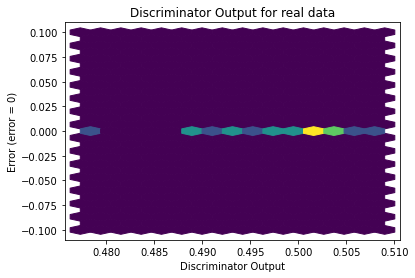

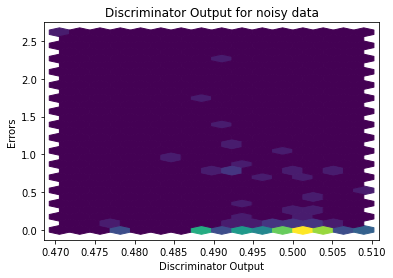

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6526]], requires_grad=True)
